<a href="https://colab.research.google.com/github/abhishekmanglaa/video-game-analysis/blob/main/video_game_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of <font color = 'blue'>Video</font> Games throughout the years

In [2]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1

In [4]:
#Loading the dataset as a pd dataframe with Rank as the index column
videoDF = pd.read_csv("/content/drive/My Drive/Data/HW5_videogamesales.csv", index_col = "Rank")

In [5]:
#Total number of video games .shape returns the matrix size
print("The total number of video games are:",videoDF.shape[0])

The total number of video games are: 16598


In [6]:
#Sorting and printing the top 15 most ranked games
(videoDF
 .sort_values(by = ['Rank'])
 .head(15))

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26


## Part 2

In [7]:
#Adding a new column 'Total_Sales' as the global sales across all regions
videoDF['Total_Sales'] = (videoDF['NA_Sales'] + 
                          videoDF['EU_Sales'] + videoDF['JP_Sales'] + 
                          videoDF['Other_Sales'])

In [8]:
#Lets look at our new column
videoDF

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.00


In [9]:
#Now lets look the the top 15 with the 'Total_Sales' column added
(videoDF
 .sort_values(by = ['Rank'], ascending = True)
 .head(15))

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61


## Part 3

In [10]:
#Descriptive Statistics
print("Total number of games: ",videoDF.shape[0])
print("Minimum sales: ",min(videoDF['Total_Sales']))
print("Maximum sales: %.2f"% max(videoDF['Total_Sales']))
print('Median of the sales: %.2f' % videoDF['Total_Sales'].median())
print('Standard deviation of the sales: %.2f' % videoDF['Total_Sales'].std())
print('Mean of the sales: %.2f' % videoDF['Total_Sales'].mean())

Total number of games:  16598
Minimum sales:  0.0
Maximum sales: 82.74
Median of the sales: 0.17
Standard deviation of the sales: 1.56
Mean of the sales: 0.54


In [11]:
#Filtering out the video games with total sales $5M or more and year 2000 and on.
videoFilteredDF = videoDF[(videoDF.Total_Sales > 5) & (videoDF.Year >= 2000)]

#Dividing by total video games to get the ratio
percentage = (videoFilteredDF.shape[0]/videoDF.shape[0]) * 100

In [12]:
#Lets see what the percentage is
print('Percentage of video games that earned more than $5000000 and released after year 2000: %.3f'%percentage)

Percentage of video games that earned more than $5000000 and released after year 2000: 0.934


## Part 4

In [13]:
#Defining a function

def filterVideo(dataframe, category = None, value = None, n = 10):
    if(category == None or value == None):
        return dataframe.sort_values(by = ['Total_Sales'], ascending = False).head(n)
    return dataframe[dataframe[category] == value].sort_values(by = ['Total_Sales'], ascending = False).head(n)

## Part 5

In [14]:
# (a) Top 5 over-all sellers
filterVideo(dataframe = videoDF,n = 5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [15]:
# (b) Top 10 'Wii' sellers
filterVideo(dataframe = videoDF, category = 'Platform', value = 'Wii', n = 10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52


In [16]:
# (c) Top 5 selling 'Puzzle' games.
filterVideo(dataframe = videoDF, category = 'Genre', value = 'Puzzle', n = 5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Rank,,,,,,,,,,
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
156,Tetris,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58
171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34


In [17]:
# (d) Top 10 selling games in the year 1990.
filterVideo(dataframe = videoDF, category = 'Year', value = 1990, n = 10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Rank,,,,,,,,,,
19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62
216,Dr. Mario,NES,1990.0,Puzzle,Nintendo,2.62,0.60,1.52,0.10,4.84
392,F-1 Race,GB,1990.0,Racing,Nintendo,1.73,0.69,0.59,0.40,3.41
447,Dragon Warrior IV,NES,1990.0,Role-Playing,Enix Corporation,0.08,0.00,3.03,0.01,3.12
510,F-Zero,SNES,1990.0,Racing,Nintendo,1.37,0.51,0.89,0.07,2.84
589,Streets of Rage,GEN,1990.0,Action,Sega,1.86,0.55,0.11,0.08,2.60
724,Teenage Mutant Ninja Turtles II: The Arcade Game,NES,1990.0,Action,Konami Digital Entertainment,1.74,0.25,0.21,0.03,2.23
1192,Final Fight,SNES,1990.0,Action,Capcom,0.67,0.17,0.69,0.03,1.56
1280,Nintendo World Cup,NES,1990.0,Sports,Nintendo,0.28,0.50,0.65,0.05,1.48


## Part 6

In [18]:
#Correlation matrix b/w 'Total_Sales' and regional sales.
corrMartix = (videoDF
              .loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
              .corr())
corrMartix

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941050
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902839
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611821
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748351
Total_Sales,0.941050,0.902839,0.611821,0.748351,1.000000


In [19]:
#Lets see the correlational matrix.
corrMartix.loc['Total_Sales',:]

NA_Sales       0.941050
EU_Sales       0.902839
JP_Sales       0.611821
Other_Sales    0.748351
Total_Sales    1.000000
Name: Total_Sales, dtype: float64

### __We can see the correlation matrix above. Each value is the correlation between 'Total_Sales' and the index__.
[1] The correlation b/w 'Total_Sales' and itself in 1, which makes sense because they are essentially the same.

[2] The Correlation b/w 'Total_Sales' and 'Na_Sales' is the highest because it has the most contribution to the 'Total_Sales'.

## Part 7

In [20]:
#Filtering the games in year 2000
videoDF2000 = videoDF[videoDF['Year'] == 2000]

In [21]:
#Filtering the gamesin year 2015
videoDF2015 = videoDF[videoDF['Year'] == 2015]

In [22]:
#Getting the correlation matrix for year 2000
(videoDF2000
 .loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
 .corr()
 .loc['Total_Sales',:])

NA_Sales       0.900914
EU_Sales       0.866584
JP_Sales       0.512328
Other_Sales    0.762164
Total_Sales    1.000000
Name: Total_Sales, dtype: float64

In [23]:
#Getting the correlation matrix for the year 2015
(videoDF2015
 .loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
 .corr()
 .loc['Total_Sales',:])

NA_Sales       0.911533
EU_Sales       0.922360
JP_Sales       0.307129
Other_Sales    0.956571
Total_Sales    1.000000
Name: Total_Sales, dtype: float64

## The video game industry began in NA (North America) and EU (Europe).

[1] The major difference between the year 2000 and the year 2015 is that insitally the video game insdustry was solid in North America hence it has a higher corrlation with 'Total_Sales'

[2] But as we move to the year 2015 other nations catch up on the digital revolution and the sales in other countries surpasses that of the North Americas and thus has a higher correlation with 'Total_Sales'

## Part 8

## In this section we will explore how the popular video game platform compare to each other and also their sales along the years from when they were launched. (Kind of a time series analysis)

In [24]:
#Let's start by looking at the total sales of the gaming platforms. Let's look at top 10
#Let's drop the year column because it has no significance

(videoDF
 .groupby('Platform')
 .sum()
 .sort_values(by = ['Total_Sales'], ascending = False)
 .drop(columns = ['Year'])
 .head(10))

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.77
X360,601.05,280.58,12.43,85.54,979.60
PS3,392.26,343.71,79.99,141.93,957.89
Wii,507.71,268.38,69.35,80.61,926.05
DS,390.71,194.65,175.57,60.53,821.46
PS,336.51,213.60,139.82,40.91,730.84
GBA,187.54,75.25,47.33,7.73,317.85
PSP,108.99,68.25,76.79,42.19,296.22
PS4,96.80,123.70,14.30,43.36,278.16


## We can see that 'PS2', 'PS3', 'DS' and the 'Wii' were the most popular platforms. It would be fair to assume that they also had the most number of games released since they made the most money.

In [25]:
#Lets see who had the most number of games produced
#Lets look at the top 10

videoDF.Platform.value_counts()[0:10]

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: Platform, dtype: int64

### Our assumption was right, they are the top four!

Text(0, 0.5, 'Sales in $ millions')

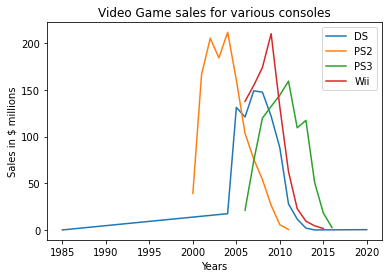

In [26]:
#Plotting the sales every year for the top 4 most popular consoles based on number of games released
for platform in videoDF.Platform.value_counts().index[0:4]:
    sportsDF = videoDF[videoDF['Platform'] == platform].groupby(by = ['Year']).sum()
    plt.plot(sportsDF.index, sportsDF.Total_Sales)
    #plt.legend(list[videoDF.Platform.value_counts().index[0:2]])
    
#Lets add labels and legends to make it easy to understand.
plt.legend(list(videoDF.Platform.value_counts().index[0:4]))
plt.title('Video Game sales for various consoles')
plt.xlabel('Years')
plt.ylabel('Sales in $ millions')

## Let's compare various video games. Out of all 'DS' by nintendo is still active in sales in 2020. The reason could be it's portable form factor (all others need a TV to be hookedup to) and overall a really good product.

In [27]:
(videoDF[videoDF['Year'] == 2000]
 .groupby(by = ['Genre'])
 .sum()
 .sort_values(by = ['Total_Sales'], ascending = False)
 .loc[:,'Total_Sales']
)

Genre
Sports          41.24
Action          33.98
Role-Playing    29.04
Fighting        20.26
Racing          20.00
Platform        16.05
Misc            15.55
Strategy         8.52
Shooter          6.83
Puzzle           3.83
Simulation       3.37
Adventure        2.96
Name: Total_Sales, dtype: float64

In [28]:
videoPieDF = (videoDF[videoDF['Year'] == 2015]
 .groupby(by = ['Genre'])
 .sum()
 .sort_values(by = ['Total_Sales'], ascending = False)
 .loc[['Sports','Action','Role-Playing','Strategy'],'Total_Sales']
)

In [29]:
videoPieDF = pd.DataFrame(videoPieDF)

In [30]:
videoPieDF.apply(lambda x: x/x.sum())

,Total_Sales
Genre,
Sports,0.275864
Action,0.469814
Role-Playing,0.242221
Strategy,0.012101


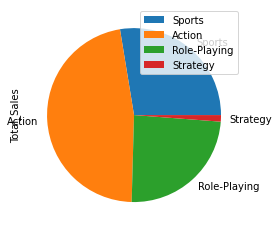

In [31]:
videoPieDF.plot.pie(y = 'Total_Sales')